In [1]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
from torch.utils.data import Dataset

import torchvision
from torchvision import datasets, transforms

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from tqdm import tqdm

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
train_error_map = []
test_error_map = []
for i in range(1, 65):
    train_error_map.append(torch.load(f'./Width_Output/{i}_width_15_noise_train_error_list.pt'))
    test_error_map.append(torch.load(f'./Width_Output/{i}_width_15_noise_test_error_list.pt'))

train_error_map = np.array(train_error_map)
test_error_map = np.array(test_error_map)

In [11]:
def uniform_imshow(x, y, z, aspect=1, cmap=plt.cm.rainbow, figure_title=None,x_axis_label='Epoch',y_axis_label='Width parameter'):
    fig = plt.imshow(z.T, cmap='viridis', aspect='auto', origin='lower', extent=[x.min(), x.max(), y[0], y[-1]], vmin=z.min(), vmax=z.max())
    plt.xscale('symlog', linthresh=10)
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.colorbar()
    plt.title(figure_title)
    plt.show()

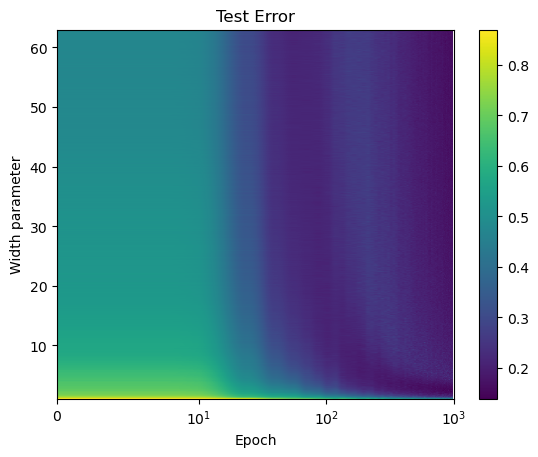

In [15]:
x = np.linspace(0, len(test_error_map[0]), len(test_error_map[0]))
y = np.array(range(1,len(test_error_map)))
uniform_imshow(x, y, test_error_map,figure_title='Test Error')

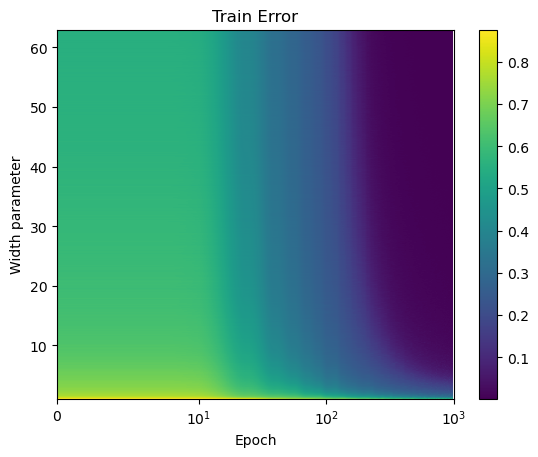

In [16]:
x = np.linspace(0, len(train_error_map[0]), len(train_error_map[0]))
y = np.array(range(1,len(train_error_map)))
uniform_imshow(x, y, train_error_map,figure_title='Train Error')